In [20]:
import pandas as pd
import matplotlib.pyplot as plt

Cargamos la base de datos en un dataframe

In [21]:
df=pd.read_csv("Colombia_COVID19_Coronavirus_casos_diarios.csv")

Creamos copia de los datos y los organizamos

In [22]:
#creamos copia de los datos
df_max_scaled=df.copy()
df_max_scaled["norm_new_cases"]=df_max_scaled["NUEVOS_CASOS"]/df_max_scaled["NUEVOS_CASOS"].abs().max()
#importante organizar los datos de menor a mayor

Se crea la función del kernel requerido y su filtro asociado tal como se hizo para el gaussiano

In [23]:
import numpy as np

def epanechnikov_filter(data, bandwidth):
    # Crear el kernel de Epanechnikov
    size = int(4 * bandwidth + 0.5)
    size = size + 1 if size % 2 == 0 else size
    kernel = epanechnikov_kernel(size, bandwidth)
    
    # convolución
    smoothed_data = np.convolve(data, kernel, mode='same')
    
    return smoothed_data

def epanechnikov_kernel(size, bandwidth):
    x = np.linspace(-(size // 2), size // 2, size)
    kernel = np.where(np.abs(x) <= bandwidth, 0.75 * (1 - (x / bandwidth) ** 2) / bandwidth, 0)
    kernel = kernel / np.sum(kernel)  # Normalizar el kernel
    
    return kernel


Ingresamos un ancho de banda que permita apreciar el suavizado de los datos y aplicamos el filtro

In [26]:
h=5
df_max_scaled["epanechnikov_smoothed"]=epanechnikov_filter(df_max_scaled["norm_new_cases"],h)

Graficamos los datos y la curva de suavizado

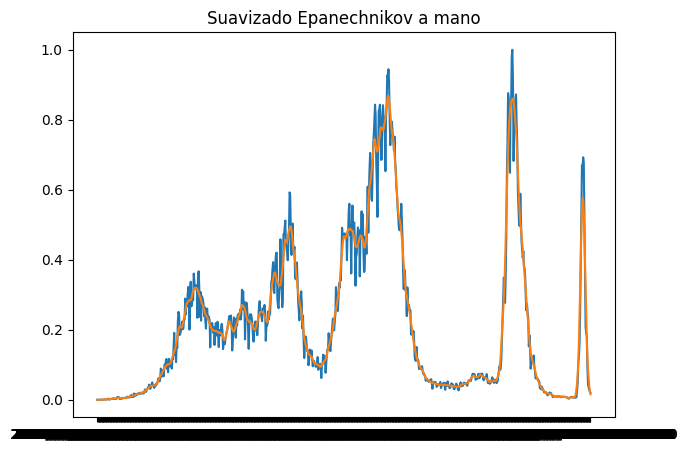

In [27]:
plt.figure(figsize=(7,5))
plt.plot(df_max_scaled["FECHA_ACTUALIZACION"],df_max_scaled["norm_new_cases"])
plt.plot(df_max_scaled["FECHA_ACTUALIZACION"],df_max_scaled["epanechnikov_smoothed"])
plt.title("Suavizado Epanechnikov a mano")
plt.show()